In [ ]:
from google.colab import drive
drive._mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [1]:
img = mpimg.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png")  
print(type(img))
print(img)

print(img.shape)

plt.imshow(img)
plt.colorbar() 

NameError: ignored

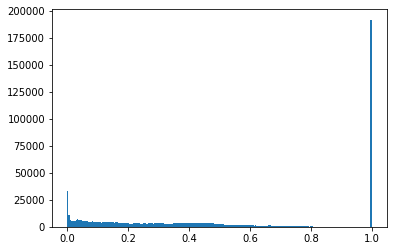

In [ ]:
#Make a histogram of the intensities in the grayscale image
plt.hist(img.ravel(),256)
plt.show()

0.44530475 0.0 1.0


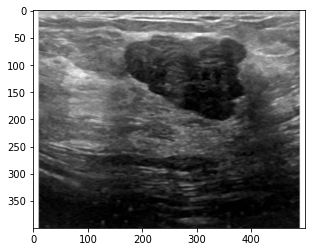

In [ ]:
mean_grey = img.mean()
max_value = img.max()
min_value = img.min()
print(mean_grey, min_value, max_value)
plt.imshow(img)

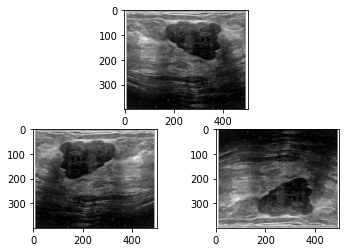

In [ ]:
flipped_img_LR = np.fliplr(img)
flipped_img_UD = np.flipud(img)

plt.subplot(2,1,1)
plt.imshow(img, cmap="Greys")
plt.subplot(2,2,3)
plt.imshow(flipped_img_LR, cmap="Blues")
plt.subplot(2,2,4)
plt.imshow(flipped_img_UD, cmap="hsv")

Apply Gaussian

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


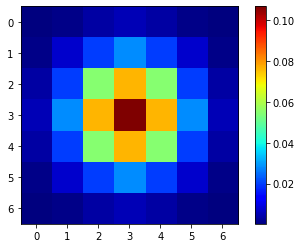

In [ ]:
import numpy 
from matplotlib import pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 

gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage.filters import convolve
from skimage import io, img_as_float

In [ ]:
img_gaussian_noise = img_as_float(io.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", as_gray=True))

img = img_salt_pepper_noise

In [ ]:
#kernel and applying it as a filter (or convolution) separately. 
kernel = np.ones((5,5),np.float32)/25    #Averaging filter with 5x5 kernel
#Normalize by dividing with 25 so all numbers add to 1
gaussian_kernel = np.array([[1/16, 1/8, 1/16],   #3x3 kernel
                [1/8, 1/4, 1/8],
                [1/16, 1/8, 1/16]])

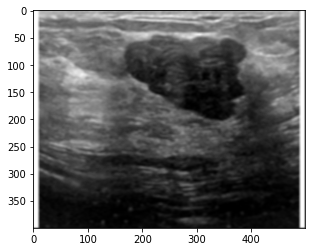

In [ ]:
conv_using_cv2 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT) 


# cv2.imshow("Original", img)
# cv2.imshow("cv2 filter", conv_using_cv2)
# cv2.imshow("Using scipy", conv_using_scipy)
# cv2.imshow("Using scipy2", conv_using_scipy2)

# cv2.waitKey(0)          
# cv2.destroyAllWindows() 


plt.imshow(conv_using_cv2,cmap = 'gray')

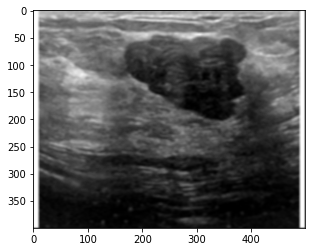

In [ ]:
conv_using_scipy = convolve2d(img, kernel, mode='same')


plt.imshow(conv_using_scipy,cmap = 'gray')

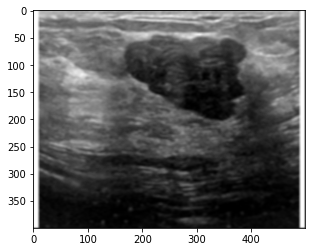

In [ ]:
conv_using_scipy2 = convolve(img, kernel, mode='constant', cval=0.0)


plt.imshow(conv_using_scipy2,cmap = 'gray')

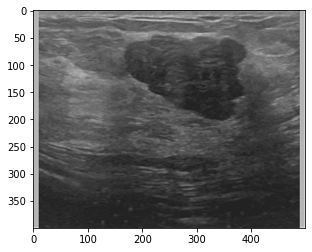

In [ ]:
#This code shows that unsharp is nothing but original + amount *(original-blurred)
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

img = img_as_float(io.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", as_gray=True))

gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)

img2 = (img - gaussian_img)*1.

img3 = img + img2

from matplotlib import pyplot as plt
plt.imshow(img3, cmap="gray")

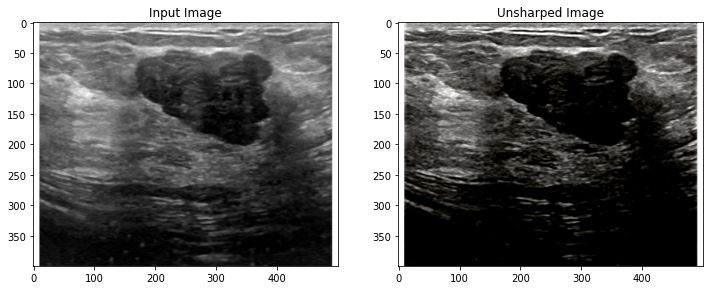

In [ ]:
#Unsharp Mask
from skimage import io
from skimage.filters import unsharp_mask

img = io.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png")

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
unsharped_img = unsharp_mask(img, radius=3, amount=1)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()

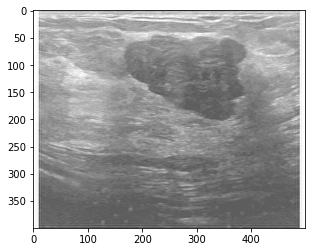

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, restoration
import numpy as np

img = io.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png",as_gray =True)


#PSF

psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

#The following page was used as reference to generate the kernel
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

# print(psf)

deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imshow(deconvolved, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  app.launch_new_instan

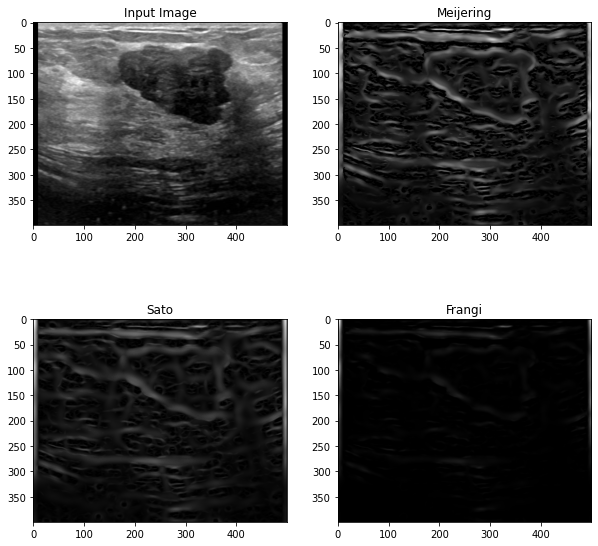

In [ ]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2

from skimage.filters import meijering, sato, frangi, hessian


img = io.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png")
img = rgb2gray(img)

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
meijering_img = meijering(img)
sato_img = sato(img)
frangi_img = frangi(img)
hessian_img = hessian(img)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(meijering_img, cmap='gray')
ax2.title.set_text('Meijering')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(sato_img, cmap='gray')
ax3.title.set_text('Sato')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(frangi_img, cmap='gray')
ax4.title.set_text('Frangi')
plt.show()

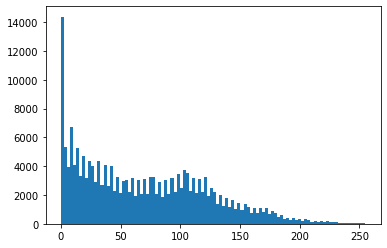

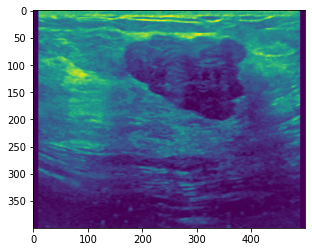

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)
equ = cv2.equalizeHist(img)

plt.hist(img.flat,bins=100,range=(0,255))
plt.show()
plt.imshow(img)

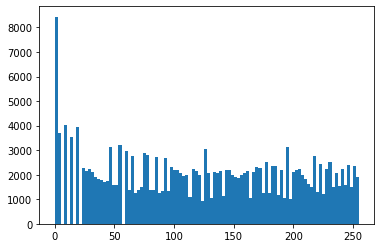

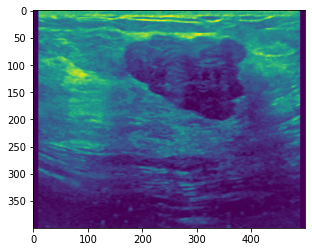

In [ ]:
plt.hist(equ.flat, bins=100, range=(0,255))
plt.show()
plt.imshow(img)

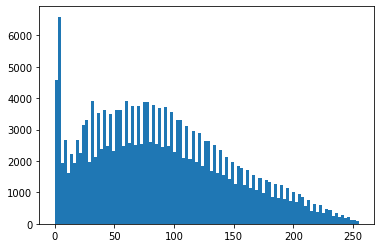

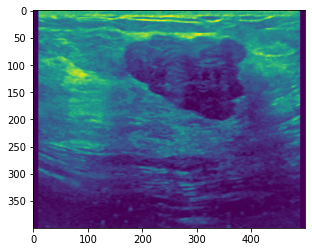

In [ ]:
#Image thresholding

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)

#Adaptive histogram equalization using CLAHE to stretch the histogram. 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)
plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)

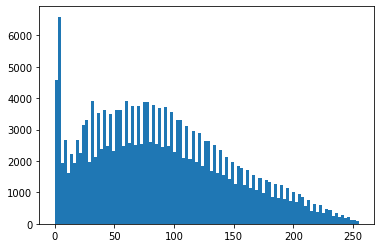

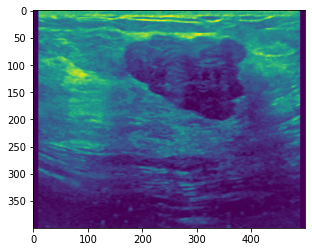

In [ ]:
#OTSU Thresholding, binarization
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)

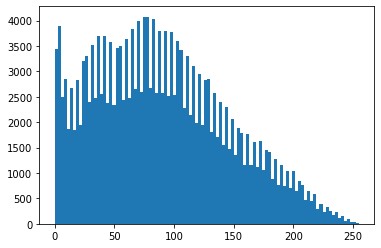

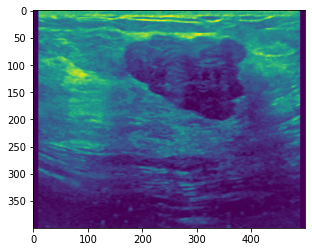

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)

blur = cv2.GaussianBlur(clahe_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.hist(blur.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png",0) 

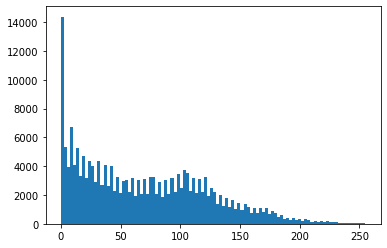

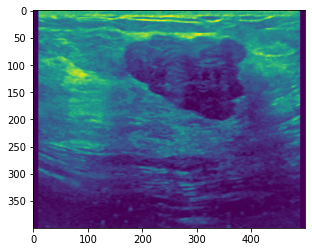

In [ ]:
plt.hist(img.flat,bins=100,range=(0,255))
plt.show()
plt.imshow(img)

In [ ]:
ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

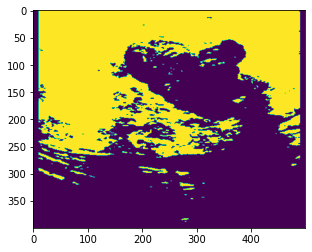

In [ ]:
plt.imshow(th)

In [ ]:
#Image thresholding

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)

#Adaptive histogram equalization using CLAHE to stretch the histogram. 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)
plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)



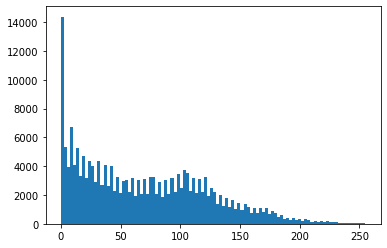

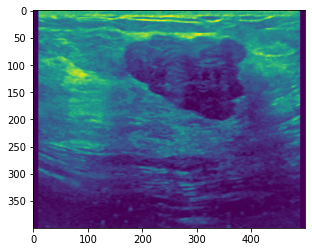

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)
equ = cv2.equalizeHist(img)

plt.hist(img.flat,bins=100,range=(0,255))
plt.show()
plt.imshow(img)



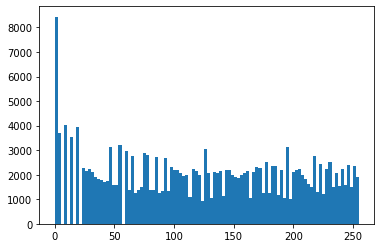

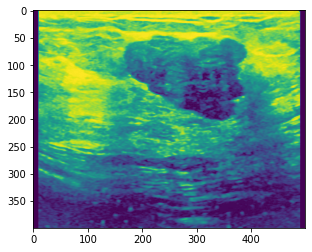

In [ ]:
plt.hist(equ.flat, bins=100, range=(0,255))
plt.show()
plt.imshow(equ)

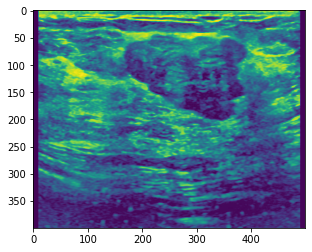

In [ ]:
# Start by creating a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
cl1 = clahe.apply(img)


plt.imshow(equ)
plt.imshow(cl1)


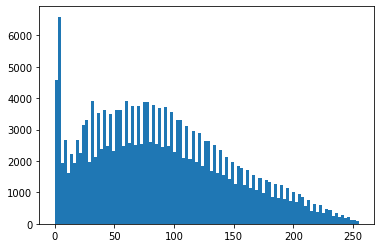

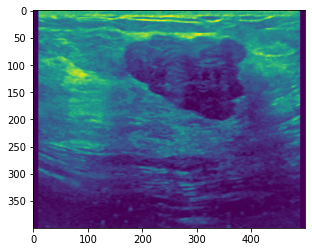

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)

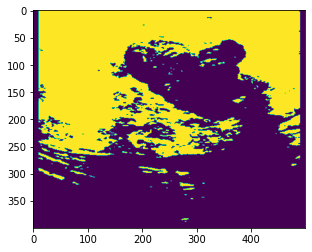

In [ ]:
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh)


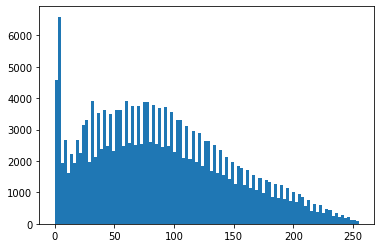

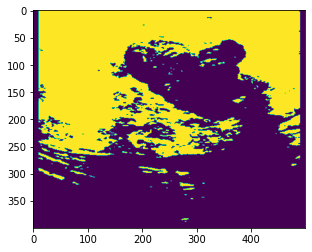

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh)

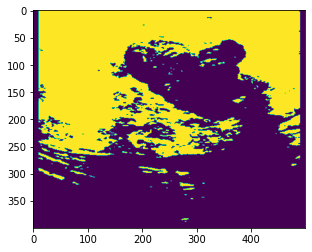

In [ ]:

import cv2
import matplotlib.pyplot as plt

colormask = np.zeros(img.shape, dtype=np.uint8)
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
plt.imshow(img)

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh)

In [ ]:

import cv2
import matplotlib.pyplot as plt

colormask = np.zeros(img.shape, dtype=np.uint8)
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
plt.imshow(img)



<class 'numpy.ndarray'>
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
(400, 500, 4)


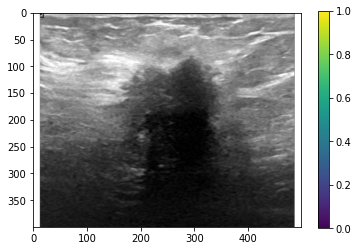

In [ ]:
img = mpimg.imread("/content/gdrive/My Drive/FYP/data/test/1/malignant (168).png")  
print(type(img))
print(img)

print(img.shape)

plt.imshow(img)
plt.colorbar()

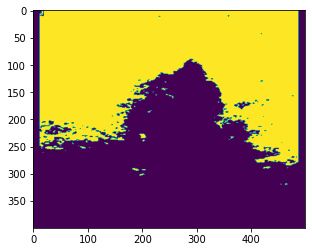

In [ ]:
bilateral_using_cv2 = cv2.bilateralFilter(blended, 5, 20, 100, borderType=cv2.BORDER_CONSTANT) 
plt.imshow(img)
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh)


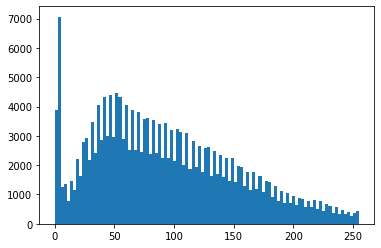

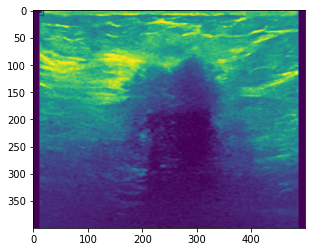

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/1/malignant (168).png", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()
plt.imshow(img)

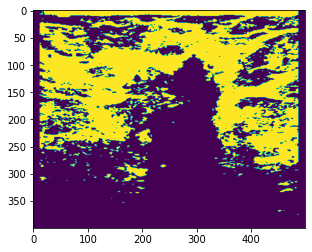

In [ ]:
ret, thresh = cv2.threshold(clahe_img,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh)

In [ ]:
import numpy as np
import cv2

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png")
img2 = img.reshape((-1,3))

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

n = 2
gmm_model = GMM(n, covariance_type='tied').fit(img2)
#The above line generates GMM model for n=2

gmm_labels  = gmm_model.predict(img2) #generate labels for segments

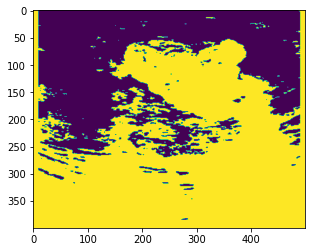

In [ ]:
original_shape = img.shape #create a variable with original image shape

segmented = gmm_labels.reshape(original_shape[0], original_shape[1])  # .reshape(1125,1500)
# we dont have a 3rd channel in our segmented image

import matplotlib.pyplot as plt
plt.imshow(segmented)

In [ ]:
bic_value = gmm_model.bic(img2)  #Remember to call the same model name from above)
print(bic_value)  #You should see bic for GMM model generated using n=2.
#Do this exercise for different n values and plot them to find the minimum.

-2433094.2380948155


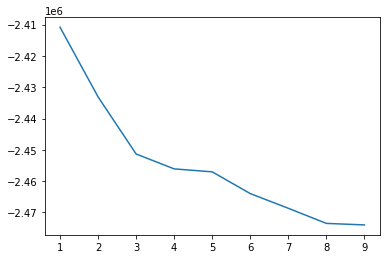

In [ ]:
n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')

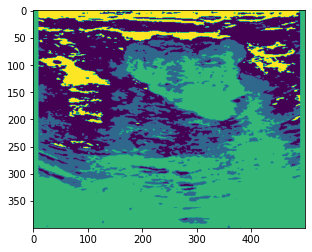

In [ ]:
import numpy as np
import cv2


#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy

img = cv2.imread("/content/gdrive/My Drive/FYP/data/test/0/benign (370).png")

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])

plt.imshow(segmented)
